In [50]:
#Below model is developed for classifying a customer as a purchaser or a non-purchaser
#Loading essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
%matplotlib inline
import math
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pylab as plt
from dmba import regressionSummary, classificationSummary, liftChart, gainsChart

In [52]:
#Loading the file to the dataframe 

Tayko_df = pd.read_csv("Tayko(2).csv")
Tayko_df.columns = [s.strip().replace(' ', '_') 
   for s in Tayko_df.columns]

In [53]:
Tayko_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   sequence_number       2000 non-null   int64
 1   US                    2000 non-null   int64
 2   source_a              2000 non-null   int64
 3   source_c              2000 non-null   int64
 4   source_b              2000 non-null   int64
 5   source_d              2000 non-null   int64
 6   source_e              2000 non-null   int64
 7   source_m              2000 non-null   int64
 8   source_o              2000 non-null   int64
 9   source_h              2000 non-null   int64
 10  source_r              2000 non-null   int64
 11  source_s              2000 non-null   int64
 12  source_t              2000 non-null   int64
 13  source_u              2000 non-null   int64
 14  source_p              2000 non-null   int64
 15  source_x              2000 non-null   int64
 16  source

In [54]:
Tayko_df.iloc[:,:12]

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,source_s
0,1,1,0,0,1,0,0,0,0,0,0,0
1,2,1,0,0,0,0,1,0,0,0,0,0
2,3,1,0,0,0,0,0,0,0,0,0,0
3,4,1,0,1,0,0,0,0,0,0,0,0
4,5,1,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,0,0,0,0,0,0,0,0,0,0
1996,1997,1,0,0,0,0,0,0,0,0,0,1
1997,1998,1,0,0,0,0,0,0,0,0,0,0
1998,1999,1,0,0,0,0,0,0,0,0,0,0


In [55]:
Tayko_df = Tayko_df.drop(columns='Spending')
Tayko_df = Tayko_df.drop(columns='sequence_number')

In [56]:
#printing unique values

for columns in Tayko_df:
  print("The unique values in column:",columns,"=",len(columns))

The unique values in column: US = 2
The unique values in column: source_a = 8
The unique values in column: source_c = 8
The unique values in column: source_b = 8
The unique values in column: source_d = 8
The unique values in column: source_e = 8
The unique values in column: source_m = 8
The unique values in column: source_o = 8
The unique values in column: source_h = 8
The unique values in column: source_r = 8
The unique values in column: source_s = 8
The unique values in column: source_t = 8
The unique values in column: source_u = 8
The unique values in column: source_p = 8
The unique values in column: source_x = 8
The unique values in column: source_w = 8
The unique values in column: Freq = 4
The unique values in column: last_update_days_ago = 20
The unique values in column: 1st_update_days_ago = 19
The unique values in column: Web_order = 9
The unique values in column: Gender=male = 11
The unique values in column: Address_is_res = 14
The unique values in column: Purchase = 8


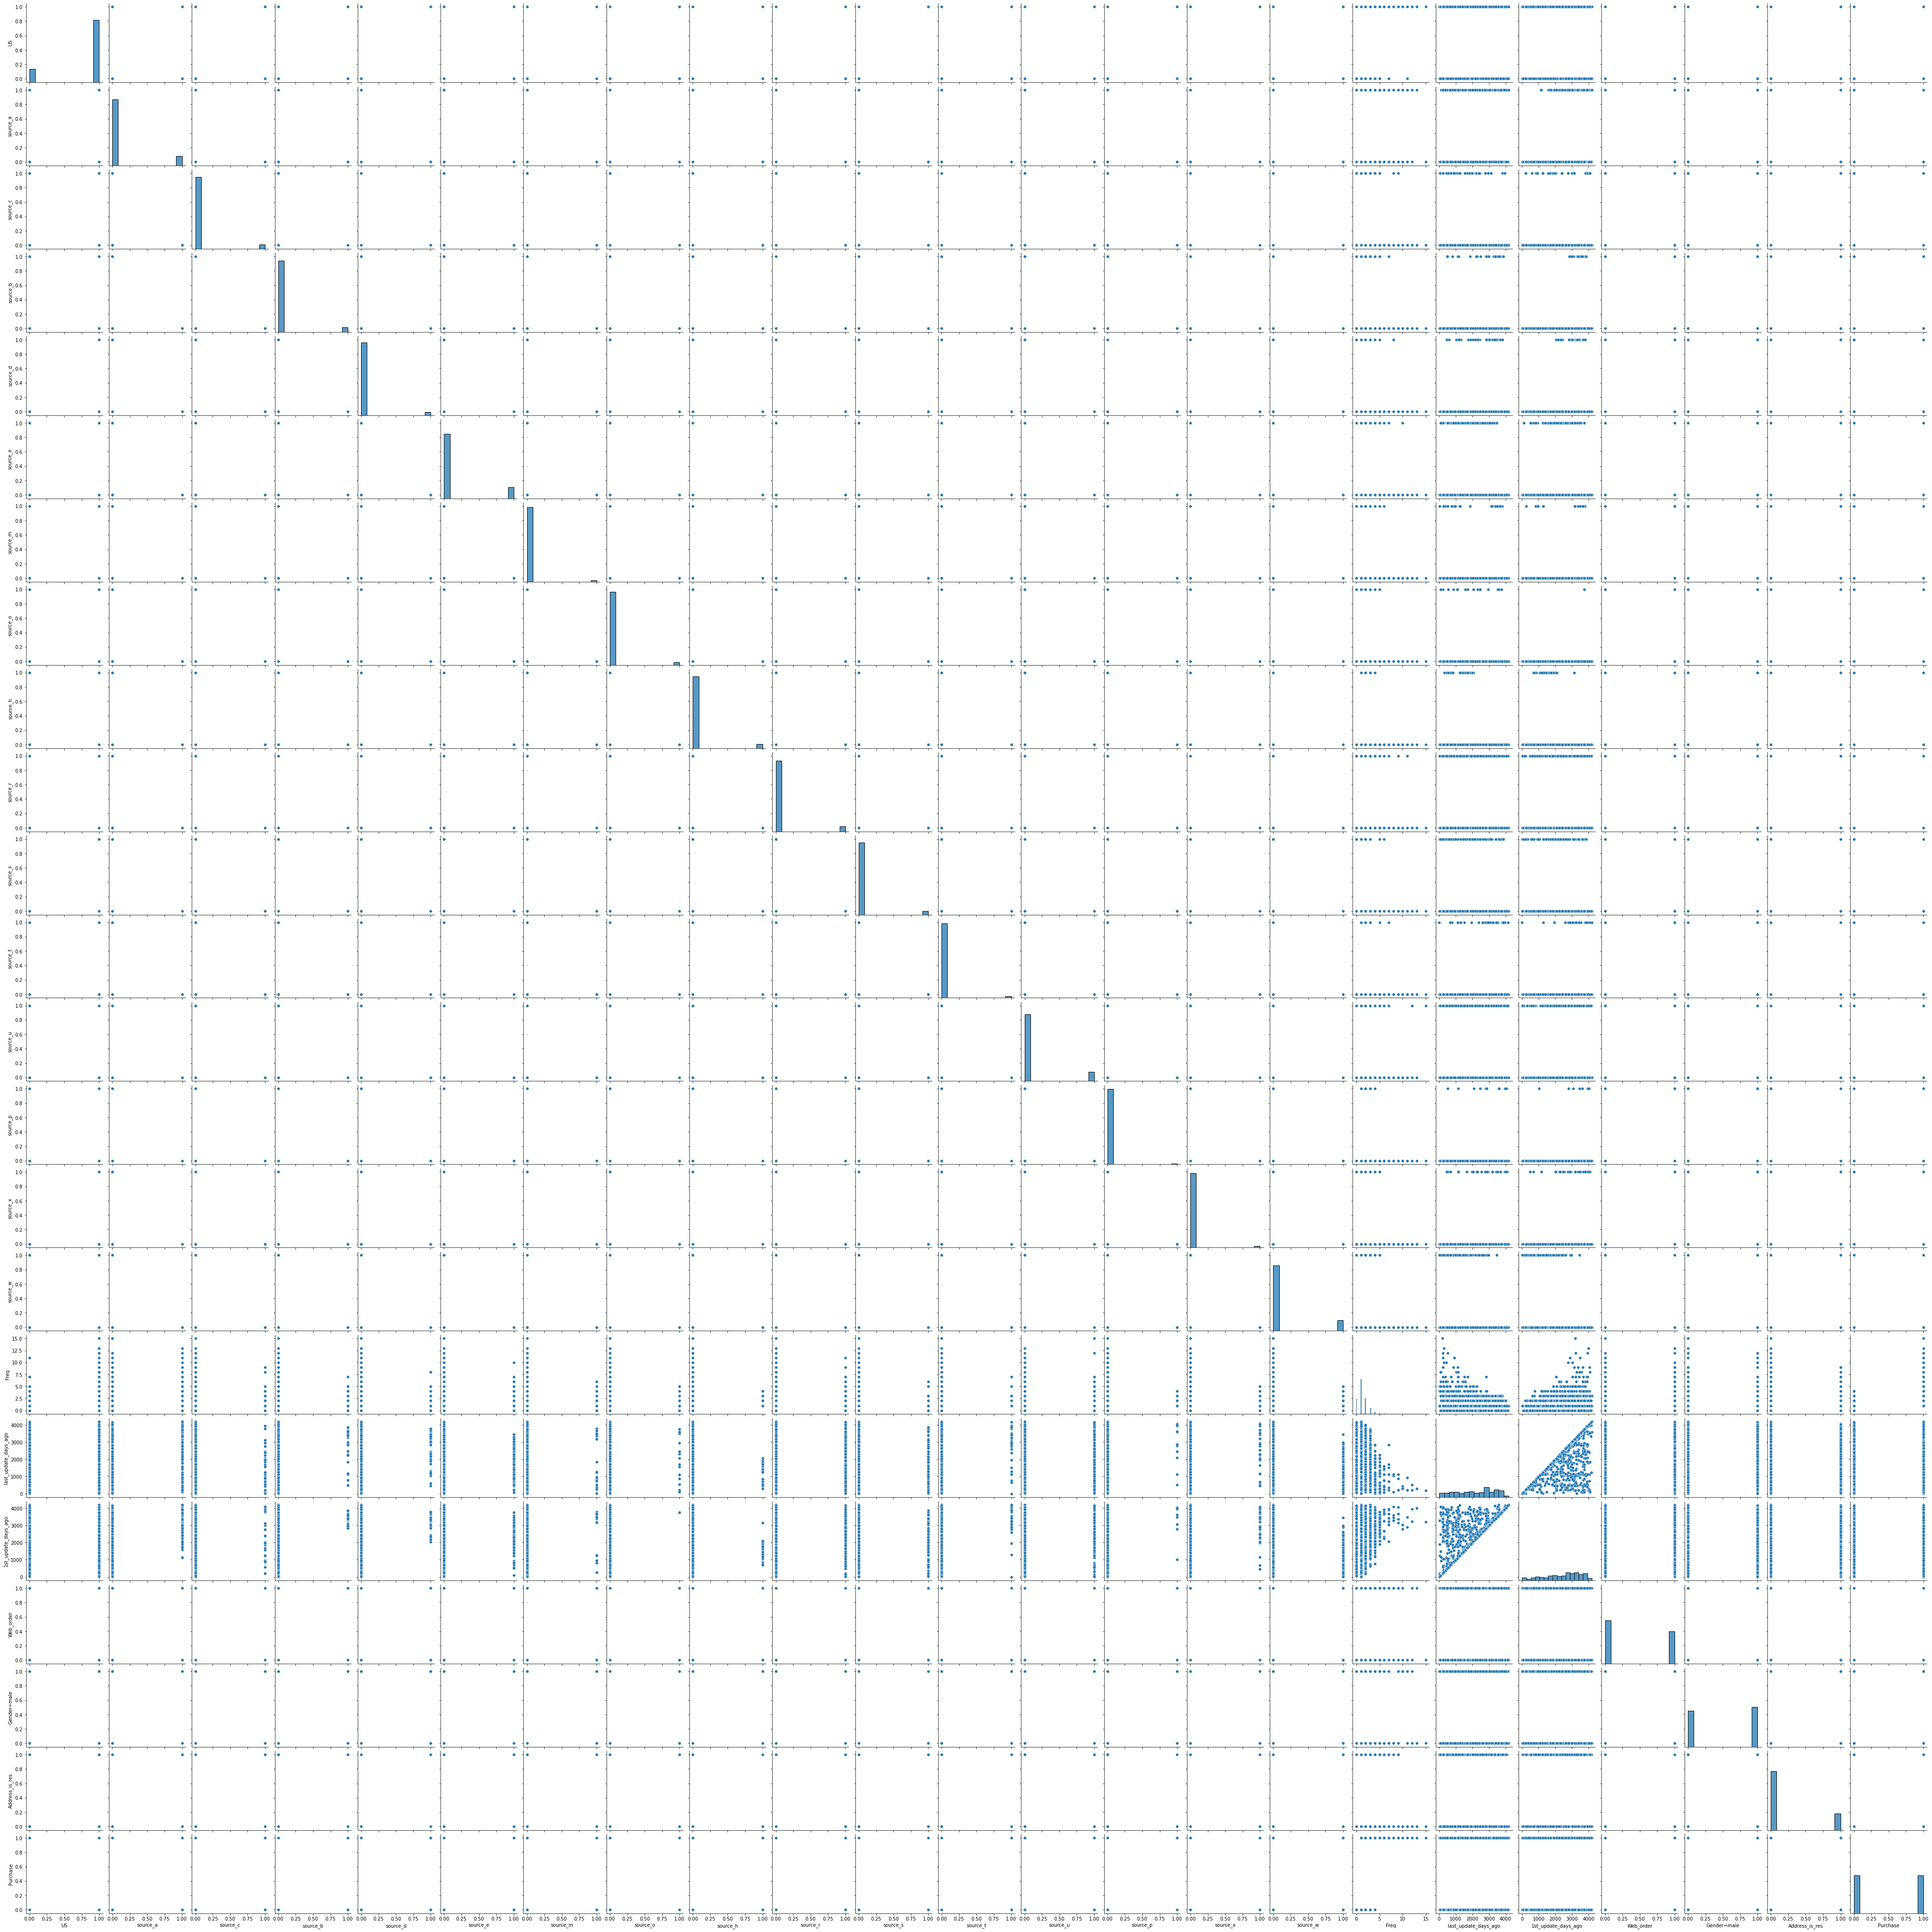

In [57]:
sns.pairplot(Tayko_df)

import matplotlib.pyplot as plt
plt.show()

In [46]:
#Describing Data 

Tayko_df.describe()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_u,source_p,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web_order,Gender=male,Address_is_res
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,0.824500,0.126500,0.056000,0.060000,0.041500,0.151000,0.01650,0.033500,0.052500,...,0.119000,0.006000,0.018000,0.137500,1.417000,2155.101000,2435.601500,0.426000,0.524500,0.221000
std,577.494589,0.380489,0.332495,0.229979,0.237546,0.199493,0.358138,0.12742,0.179983,0.223089,...,0.323869,0.077246,0.132984,0.344461,1.405738,1141.302846,1077.872233,0.494617,0.499524,0.415024
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1133.000000,1671.250000,0.000000,0.000000,0.000000
50%,1000.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2280.000000,2721.000000,0.000000,1.000000,0.000000
75%,1500.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,3139.250000,3353.000000,1.000000,1.000000,0.000000
max,2000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,15.000000,4188.000000,4188.000000,1.000000,1.000000,1.000000


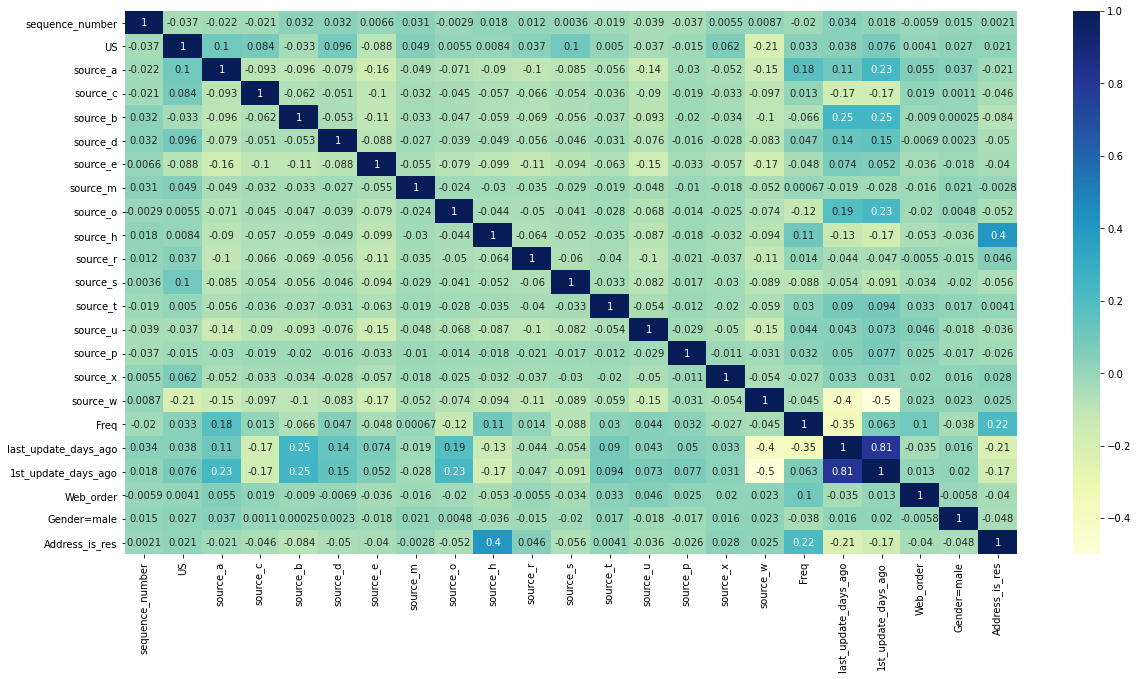

In [47]:
#Generating heatmap for correlation matrix

plt.figure(figsize = (20,10))
sns.heatmap(Tayko_df.corr(),cmap="YlGnBu", annot = True);

In [58]:
#Perfoming Logistic Regression without L2 penalty to further compare the model later with L2 penalty and classifier regression 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

excludeColumns = ('Purchase')
y = Tayko_df['Purchase']
X = Tayko_df.drop(columns = "Purchase")

X_train = sc.fit_transform(X)
X_test = sc.transform(X_train)

train_X, valid_X, train_y, valid_y = train_test_split(X_test, y, test_size=0.4, random_state=1)
reg = LogisticRegression()
reg.fit(train_X, train_y)

C:\Users\rahul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
regressionSummary(train_y, reg.predict(train_X))
regressionSummary(valid_y, reg.predict(valid_X))


Regression statistics

               Mean Error (ME) : 0.0117
Root Mean Squared Error (RMSE) : 0.4378
     Mean Absolute Error (MAE) : 0.1917

Regression statistics

               Mean Error (ME) : 0.0250
Root Mean Squared Error (RMSE) : 0.4301
     Mean Absolute Error (MAE) : 0.1850


In [60]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
train_X, valid_X, train_y, valid_y = train_test_split(X_test, y, test_size=0.4, random_state=1)
reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
reg.fit(train_X, train_y)

LogisticRegression(C=1e+42, solver='liblinear')

In [61]:
regressionSummary(train_y, reg.predict(train_X))
regressionSummary(valid_y, reg.predict(valid_X))


Regression statistics

               Mean Error (ME) : 0.1550
Root Mean Squared Error (RMSE) : 0.6298
     Mean Absolute Error (MAE) : 0.3967

Regression statistics

               Mean Error (ME) : 0.1837
Root Mean Squared Error (RMSE) : 0.6755
     Mean Absolute Error (MAE) : 0.4562


In [62]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Classification Report:\n{}\n'.format(classification_report(y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
        res = cross_val_score(classifier, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))
        return accuracy_score(y_train,classifier.predict(X_train))
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))
        return accuracy_score(y_test,classifier.predict(X_test))

In [63]:
#Testing the Training Data vs the Validation data accuracy after the PCA
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state = 42)

classifier_lr.fit(train_X,train_y)
lr_train_accuracy = print_score(classifier_lr,train_X,train_y,valid_X,valid_y,train=True)

Training results:

Accuracy Score: 0.6033

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.77      0.67       619
           1       0.63      0.43      0.51       581

    accuracy                           0.60      1200
   macro avg       0.61      0.60      0.59      1200
weighted avg       0.61      0.60      0.59      1200


Confusion Matrix:
[[474 145]
 [331 250]]

Average Accuracy:	0.6050

Standard Deviation:	0.0239


In [37]:
lr_train_accuracy = print_score(classifier_lr,train_X,train_y,valid_X,valid_y,train=False)

Test results:

Accuracy Score: 0.6100

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.64      0.61       381
           1       0.64      0.58      0.61       419

    accuracy                           0.61       800
   macro avg       0.61      0.61      0.61       800
weighted avg       0.61      0.61      0.61       800


Confusion Matrix:
[[243 138]
 [174 245]]

